# Prediction PM2.5 by regression(แบบจำลองตัวแปรอื่นใน future_data)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv('air4thai_44t_2024-02-01_2024-02-29.csv')
del df['Unnamed: 0']
df

,DATETIMEDATA,PM25,O3,WS,TEMP,RH,WD
0,2024-02-01 00:00:00,19.6,1.0,0,26,82,110
1,2024-02-01 01:00:00,19.2,12.0,0,26,85,108
2,2024-02-01 02:00:00,19.0,9.0,0,26,86,106
3,2024-02-01 03:00:00,17.8,1.0,0,25,88,111
4,2024-02-01 04:00:00,13.8,0.0,0,25,89,116
...,...,...,...,...,...,...,...
691,2024-02-29 19:00:00,23.4,NaN,1,29,70,116
692,2024-02-29 20:00:00,21.8,0.0,1,29,71,151
693,2024-02-29 21:00:00,25.1,0.0,1,28,71,143
694,2024-02-29 22:00:00,19.5,1.0,1,28,71,120


## Clean data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATETIMEDATA  696 non-null    object 
 1   PM25          683 non-null    float64
 2   O3            572 non-null    float64
 3   WS            696 non-null    int64  
 4   TEMP          696 non-null    int64  
 5   RH            696 non-null    int64  
 6   WD            696 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 38.2+ KB


In [5]:
df.dtypes

DATETIMEDATA     object
PM25            float64
O3              float64
WS                int64
TEMP              int64
RH                int64
WD                int64
dtype: object

In [6]:
df['DATETIMEDATA'] = pd.to_datetime(df['DATETIMEDATA'])

In [7]:
df.set_index('DATETIMEDATA',
            drop=True,
            inplace=True)

In [8]:
df.fillna(round(df.mean(numeric_only=True)), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 696 entries, 2024-02-01 00:00:00 to 2024-02-29 23:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    696 non-null    float64
 1   O3      696 non-null    float64
 2   WS      696 non-null    int64  
 3   TEMP    696 non-null    int64  
 4   RH      696 non-null    int64  
 5   WD      696 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 38.1 KB


In [9]:
df

,PM25,O3,WS,TEMP,RH,WD
DATETIMEDATA,,,,,,
2024-02-01 00:00:00,19.6,1.0,0,26,82,110
2024-02-01 01:00:00,19.2,12.0,0,26,85,108
2024-02-01 02:00:00,19.0,9.0,0,26,86,106
2024-02-01 03:00:00,17.8,1.0,0,25,88,111
2024-02-01 04:00:00,13.8,0.0,0,25,89,116
...,...,...,...,...,...,...
2024-02-29 19:00:00,23.4,11.0,1,29,70,116
2024-02-29 20:00:00,21.8,0.0,1,29,71,151
2024-02-29 21:00:00,25.1,0.0,1,28,71,143


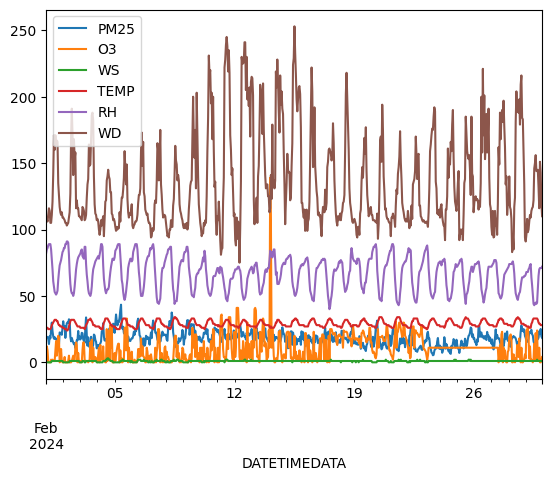

In [10]:
df.plot()
plt.show()

# save clean_data

In [11]:
data = df
data.to_csv('clean_data_2024-02-01_2024-02-29.csv', index=True)

## Create Train and Test data

In [12]:
data.columns

Index(['PM25', 'O3', 'WS', 'TEMP', 'RH', 'WD'], dtype='object')

In [13]:
col = data[data.columns[0]].count()
test = data.sample(int(0.3*col), random_state=20)
train = data.drop(test.index)

In [14]:
train.shape, test.shape

((488, 6), (208, 6))

In [15]:
train

,PM25,O3,WS,TEMP,RH,WD
DATETIMEDATA,,,,,,
2024-02-01 00:00:00,19.6,1.0,0,26,82,110
2024-02-01 02:00:00,19.0,9.0,0,26,86,106
2024-02-01 04:00:00,13.8,0.0,0,25,89,116
2024-02-01 05:00:00,19.7,0.0,0,25,89,114
2024-02-01 06:00:00,18.0,0.0,0,25,89,105
...,...,...,...,...,...,...
2024-02-29 15:00:00,14.9,2.0,1,33,44,144
2024-02-29 20:00:00,21.8,0.0,1,29,71,151
2024-02-29 21:00:00,25.1,0.0,1,28,71,143


In [16]:
test

,PM25,O3,WS,TEMP,RH,WD
DATETIMEDATA,,,,,,
2024-02-28 04:00:00,17.8,17.0,1,27,74,108
2024-02-19 08:00:00,19.0,18.0,1,29,71,112
2024-02-27 08:00:00,20.6,11.0,1,29,67,96
2024-02-18 08:00:00,22.2,11.0,1,29,68,120
2024-02-01 10:00:00,19.5,1.0,1,30,61,142
...,...,...,...,...,...,...
2024-02-14 22:00:00,20.9,6.0,1,28,74,134
2024-02-02 10:00:00,19.3,0.0,1,31,59,127
2024-02-02 11:00:00,15.8,0.0,1,32,54,169


## Setup data 

In [17]:
from pycaret.regression import *
s = setup(data=train,
        test_data=test, 
        target='PM25',
        session_id=123)

,Description,Value
0,Session id,123
1,Target,PM25
2,Target type,Regression
3,Original data shape,"(696, 6)"
4,Transformed data shape,"(696, 6)"
5,Transformed train set shape,"(488, 6)"
6,Transformed test set shape,"(208, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


## Compare_model

In [18]:
best = compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,3.8563,24.5656,4.8272,-0.1667,0.2584,0.2385,0.0100
et,Extra Trees Regressor,3.9157,25.4285,4.8868,-0.1745,0.2615,0.2385,0.0160
ada,AdaBoost Regressor,3.9402,25.8877,4.9060,-0.1610,0.2649,0.2548,0.0070
br,Bayesian Ridge,3.9483,25.2656,4.9032,-0.1964,0.2687,0.2492,0.0030
lasso,Lasso Regression,3.9537,25.2712,4.9065,-0.1987,0.2683,0.2497,0.2770
llar,Lasso Least Angle Regression,3.9537,25.2712,4.9065,-0.1987,0.2683,0.2497,0.0030
en,Elastic Net,3.9552,25.3265,4.9118,-0.2023,0.2692,0.2496,0.0030
ridge,Ridge Regression,3.9683,25.7966,4.9403,-0.2157,0.2718,0.2492,0.1540
lr,Linear Regression,3.9685,25.8010,4.9406,-0.2159,0.2718,0.2492,0.3640
huber,Huber Regressor,3.9833,26.1657,4.9742,-0.2370,0.2753,0.2468,0.0040


In [19]:
best

GradientBoostingRegressor(random_state=123)

In [20]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

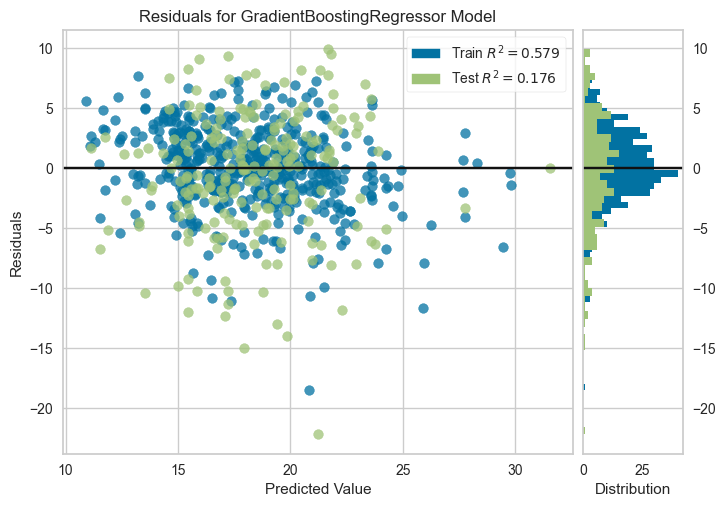

In [21]:
plot_model(best, plot = 'residuals')

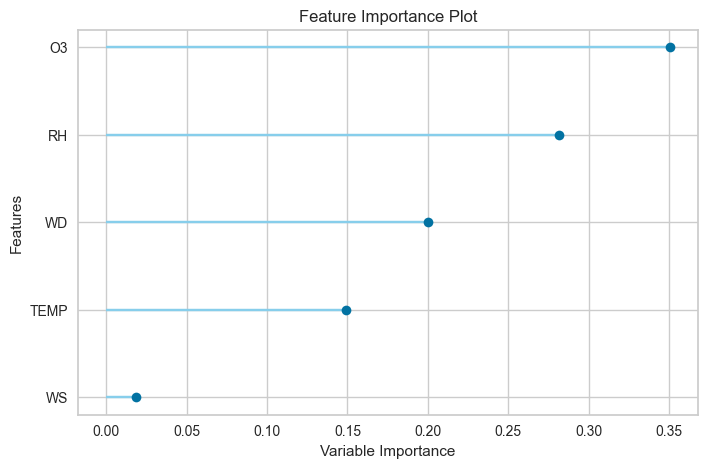

In [22]:
plot_model(best, plot = 'feature')

## Predict_model

In [23]:
pre = predict_model(best)
pre

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,3.9620,26.7336,5.1705,0.1756,0.2620,0.2260


,O3,WS,TEMP,RH,WD,PM25,prediction_label
DATETIMEDATA,,,,,,,
2024-02-28 04:00:00,17.0,1,27,74,108,17.799999,17.092696
2024-02-19 08:00:00,18.0,1,29,71,112,19.000000,18.755926
2024-02-27 08:00:00,11.0,1,29,67,96,20.600000,17.796498
2024-02-18 08:00:00,11.0,1,29,68,120,22.200001,17.588120
2024-02-01 10:00:00,1.0,1,30,61,142,19.500000,18.428286
...,...,...,...,...,...,...,...
2024-02-14 22:00:00,6.0,1,28,74,134,20.900000,18.731921
2024-02-02 10:00:00,0.0,1,31,59,127,19.299999,19.860528
2024-02-02 11:00:00,0.0,1,32,54,169,15.800000,19.259609


In [24]:
predictions = predict_model(best, data=data)
predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,3.0028,16.0603,4.0075,0.4455,0.2126,0.1805


,O3,WS,TEMP,RH,WD,PM25,prediction_label
DATETIMEDATA,,,,,,,
2024-02-01 00:00:00,1.0,0,26,82,110,19.600000,19.943419
2024-02-01 01:00:00,12.0,0,26,85,108,19.200001,18.161224
2024-02-01 02:00:00,9.0,0,26,86,106,19.000000,21.437768
2024-02-01 03:00:00,1.0,0,25,88,111,17.799999,23.573543
2024-02-01 04:00:00,0.0,0,25,89,116,13.800000,19.606761
...,...,...,...,...,...,...,...
2024-02-29 19:00:00,11.0,1,29,70,116,23.400000,16.742426
2024-02-29 20:00:00,0.0,1,29,71,151,21.799999,21.477758
2024-02-29 21:00:00,0.0,1,28,71,143,25.100000,21.477758


In [25]:
fig = px.line(predictions, x=predictions.index, y=['PM25','prediction_label'], template = 'plotly_dark', title='PM25 vs Prediction Label')
fig.show()

In [26]:
final_best = finalize_model(best)

In [27]:
predictions_final = predict_model(final_best, data=data)
predictions_final

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.9186,14.8405,3.8523,0.4876,0.2082,0.1787


,O3,WS,TEMP,RH,WD,PM25,prediction_label
DATETIMEDATA,,,,,,,
2024-02-01 00:00:00,1.0,0,26,82,110,19.600000,19.965472
2024-02-01 01:00:00,12.0,0,26,85,108,19.200001,17.577019
2024-02-01 02:00:00,9.0,0,26,86,106,19.000000,19.630219
2024-02-01 03:00:00,1.0,0,25,88,111,17.799999,23.153936
2024-02-01 04:00:00,0.0,0,25,89,116,13.800000,19.037423
...,...,...,...,...,...,...,...
2024-02-29 19:00:00,11.0,1,29,70,116,23.400000,18.201853
2024-02-29 20:00:00,0.0,1,29,71,151,21.799999,22.030634
2024-02-29 21:00:00,0.0,1,28,71,143,25.100000,21.454533


In [28]:
fig = px.line(predictions_final, x=predictions_final.index, y=['PM25','prediction_label'], template = 'plotly_dark', title='PM25 vs Prediction Label')
fig.show()

### สร้าง future_data โดยจำลองข้อมูลในตัวแปรต่าง ๆ ใน future_data โดยการสุ่มข้อมูลจาก data เดิม โดยใช้ค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐานช่วยในการแจกแจงการสุ่ม

In [29]:
data.describe()

,PM25,O3,WS,TEMP,RH,WD
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,18.411207,10.645115,0.909483,28.972701,67.429598,135.397989
std,5.385829,10.808559,0.454074,2.456084,12.356954,35.842597
min,5.300000,0.000000,0.000000,24.000000,40.000000,75.000000
25%,14.800000,2.000000,1.000000,27.000000,56.750000,108.000000
50%,18.000000,11.000000,1.000000,28.000000,70.000000,121.500000
75%,21.400000,17.000000,1.000000,31.000000,77.000000,157.000000
max,43.400000,139.000000,3.000000,34.000000,91.000000,253.000000


In [30]:
future_date_range = pd.date_range(name='DATETIMEDATA',start='2024-03-01 00:00:00', end='2024-03-07 23:00:00', freq='H')

future_data = pd.DataFrame(index=future_date_range, columns=['O3', 'WS', 'TEMP', 'RH', 'WD'])

for col in future_data.columns:
    col_mean = data[col].mean()
    col_std = data[col].std()
    
    sampled_data = np.random.normal(col_mean, col_std, size=future_data.shape[0])
    
    if col != 'TEMP':
        sampled_data[sampled_data < 0] = 0

    future_data[col] = sampled_data

future_data[['O3']] = future_data[['O3']].round(1)
future_data[['WS', 'TEMP', 'RH', 'WD']] = future_data[['WS', 'TEMP', 'RH', 'WD']].astype(int)

future_data

,O3,WS,TEMP,RH,WD
DATETIMEDATA,,,,,
2024-03-01 00:00:00,0.0,0,29,83,179
2024-03-01 01:00:00,21.4,0,30,83,120
2024-03-01 02:00:00,13.7,0,32,55,136
2024-03-01 03:00:00,0.0,0,25,60,157
2024-03-01 04:00:00,4.4,0,27,46,77
...,...,...,...,...,...
2024-03-07 19:00:00,18.3,1,28,87,134
2024-03-07 20:00:00,17.8,0,30,87,187
2024-03-07 21:00:00,0.9,0,29,88,167


In [31]:
predictions_future = predict_model(final_best, data=future_data)
predictions_future

,O3,WS,TEMP,RH,WD,prediction_label
DATETIMEDATA,,,,,,
2024-03-01 00:00:00,0.000000,0,29,83,179,18.381747
2024-03-01 01:00:00,21.400000,0,30,83,120,15.608429
2024-03-01 02:00:00,13.700000,0,32,55,136,15.016070
2024-03-01 03:00:00,0.000000,0,25,60,157,19.064175
2024-03-01 04:00:00,4.400000,0,27,46,77,21.830178
...,...,...,...,...,...,...
2024-03-07 19:00:00,18.299999,1,28,87,134,14.781798
2024-03-07 20:00:00,17.799999,0,30,87,187,13.977018
2024-03-07 21:00:00,0.900000,0,29,88,167,16.431644


In [32]:
concat_df = pd.concat([data,predictions_future], axis=0)
fig = px.line(concat_df, x=concat_df.index, y=["PM25", "prediction_label"], template = 'plotly_dark')
fig.show()

In [33]:
save_model(final_best, 'my_final_best_regression_simulate_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['O3', 'WS', 'TEMP', 'RH', 'WD'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  GradientBoostingRegressor(random_state=123))]),
 'my_final_best_regression_simulate_model.pkl')

In [34]:
loaded_model = load_model('my_final_best_regression_simulate_model')

Transformation Pipeline and Model Successfully Loaded


# Save Predict future_data to csv

In [35]:
predictions_future.rename(columns={'prediction_label': 'PM25'}, inplace=True)
predictions_future.to_csv('modelpm25_regression_simulate.csv', index=True)

## Use module to check daily_quality of air after prediction

In [36]:
from module_quality_air.quality_after_predict import *
avg_factor_quality('modelpm25_regression_simulate.csv')